<a href="https://colab.research.google.com/github/ShahadBandaar/MASAAR/blob/main/Final_Project_Masar(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*




# Data Description

- Age: Represents the age of the patients in years. It ranges from 18 to 89.
- Temperature: Indicates the body temperature of the patients. The values are normally distributed around 37.5 with a standard deviation of 0.5.
- Cough: Indicates whether the patients have a cough. It is a categorical feature with two options: "Yes" or "No".
- Sore Throat: Indicates whether the patients have a sore throat. It is a categorical feature with two options: "Yes" or "No".
- Fatigue: Indicates whether the patients experience fatigue. It is a categorical feature with two options: "Yes" or "No".
- Daily Vitamin D Intake: Represents the daily intake of vitamin D in International Units (IU). The values range from 400 to 2000 and are randomly generated.
- COVID-19 Positive: Indicates whether the patients are COVID-19 positive. It is a categorical target variable with two options: "Yes" or "No".

In [ ]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("/content/covid_dataset2.csv")


# Data Exploration


In [ ]:
#print all colmns name  in dataset
df.columns

Index(['Age', 'Temperature', 'Cough', 'Sore Throat', 'Fatigue',
       'Daily Vitamin D Intake', 'COVID-19 Positive'],
      dtype='object')

In [ ]:
#print only first 5 rows
df.head()

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
0,69,37.371591,No,Yes,Yes,542,NaN
1,32,38.012143,No,Yes,NaN,1624,No
2,89,36.688738,Yes,No,NaN,1603,No
3,78,37.670494,Yes,Yes,NaN,1113,Yes
4,38,37.512786,Yes,No,No,1787,No


In [ ]:
#print information of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   Temperature             1000 non-null   float64
 2   Cough                   1000 non-null   object 
 3   Sore Throat             999 non-null    object 
 4   Fatigue                 996 non-null    object 
 5   Daily Vitamin D Intake  1000 non-null   int64  
 6   COVID-19 Positive       999 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None


In [ ]:
#calculate statisical measures
statistics = df.describe()
statistics

,Age,Temperature,Daily Vitamin D Intake
count,1000.000000,1000.000000,1000.000000
mean,52.878000,37.531962,1201.188000
std,20.960832,0.509894,460.191972
min,18.000000,35.824195,403.000000
25%,34.750000,37.193889,814.000000
50%,52.500000,37.526769,1200.000000
75%,71.000000,37.880216,1613.000000
max,89.000000,39.083686,1999.000000


In [ ]:
#check the missing values
import matplotlib.pyplot as plt
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                       0
Temperature               0
Cough                     0
Sore Throat               1
Fatigue                   4
Daily Vitamin D Intake    0
COVID-19 Positive         1
dtype: int64


# Data cleaning

In [ ]:
#checks how many null values
df.isnull().sum()

Age                       0
Temperature               0
Cough                     0
Sore Throat               1
Fatigue                   4
Daily Vitamin D Intake    0
COVID-19 Positive         1
dtype: int64

In [ ]:
# drop rows with null
newdf=df.dropna()

In [ ]:
#check for duplicated values
newdf.duplicated()


4      False
5       True
6      False
7      False
8      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 994, dtype: bool

In [ ]:
#check how many duplicated values
newdf.duplicated().sum()

1

In [ ]:
#drop duplicated values
newdf=newdf.drop_duplicates()

newdf.head()

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
4,38,37.512786,Yes,No,No,1787,No
6,20,36.645748,No,No,Yes,964,No
7,39,38.005173,No,Yes,No,870,No
8,70,37.981395,Yes,No,No,783,No
9,19,37.586279,Yes,Yes,No,1325,No


# Fix Data Types

In [ ]:
encoding_dict = {
    "Cough": {"Yes": 1 , "No": 0},
    "Sore Throat": {"Yes": 1 , "No": 0},
    "Fatigue": {"Yes": 1 , "No": 0},
    "COVID-19 Positive": {"Yes": 1, "No": 0}
}
newdf.replace(encoding_dict, inplace=True)
newdf.head()

,Age,Temperature,Cough,Sore Throat,Fatigue,Daily Vitamin D Intake,COVID-19 Positive
4,38,37.512786,1,0,0,1787,0
6,20,36.645748,0,0,1,964,0
7,39,38.005173,0,1,0,870,0
8,70,37.981395,1,0,0,783,0
9,19,37.586279,1,1,0,1325,0


# Data visulaization

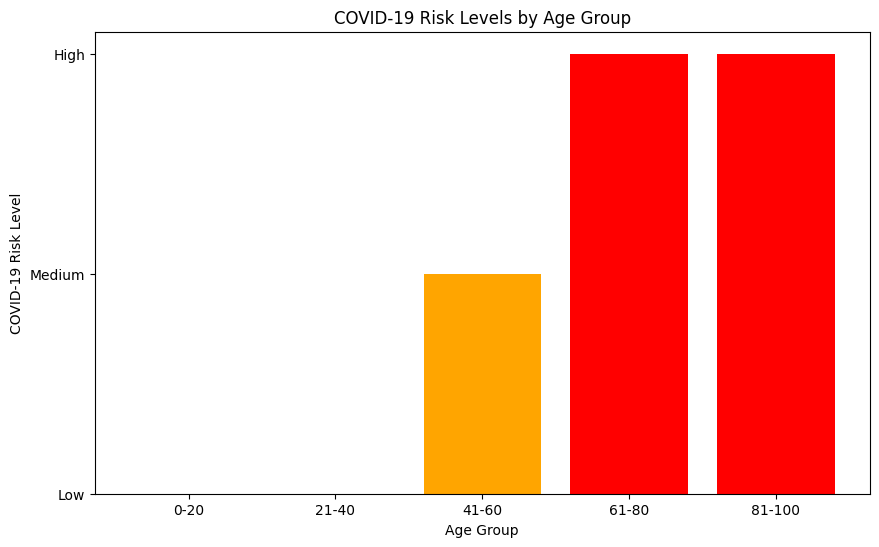

In [ ]:
# Define age ranges and corresponding risk levels
age_ranges = ["0-20","21-40","41-60","61-80","81-100"]
risk_levels = ["Low", "Low", "Medium", "High", "High"]

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(age_ranges, risk_levels, color=['green', 'green', 'orange', 'red', 'red'])
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Risk Level')
plt.title('COVID-19 Risk Levels by Age Group')
plt.show()

Text(0, 0.5, 'Temperature')

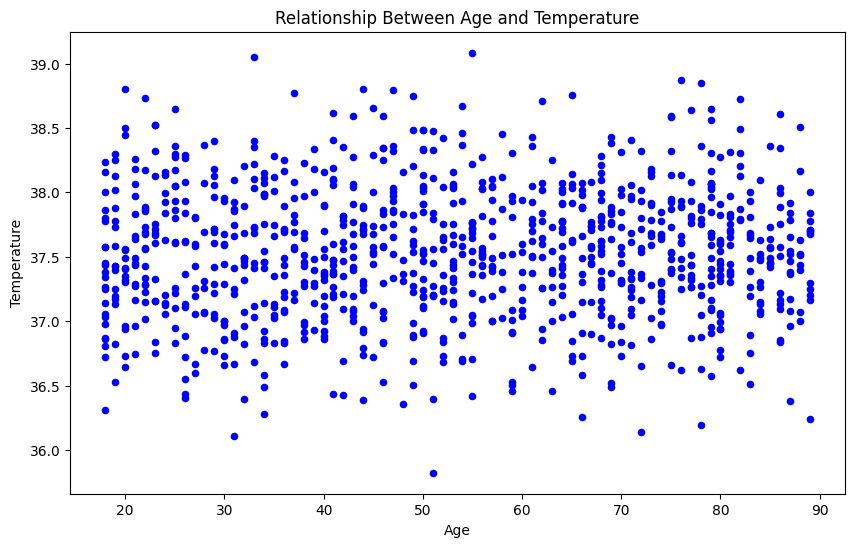

In [ ]:
newdf.plot(kind="scatter" , x="Age" , y = "Temperature" , figsize=(10,6) , color = "b")
plt.title("Relationship Between Age and Temperature")
plt.xlabel("Age")
plt.ylabel("Temperature")

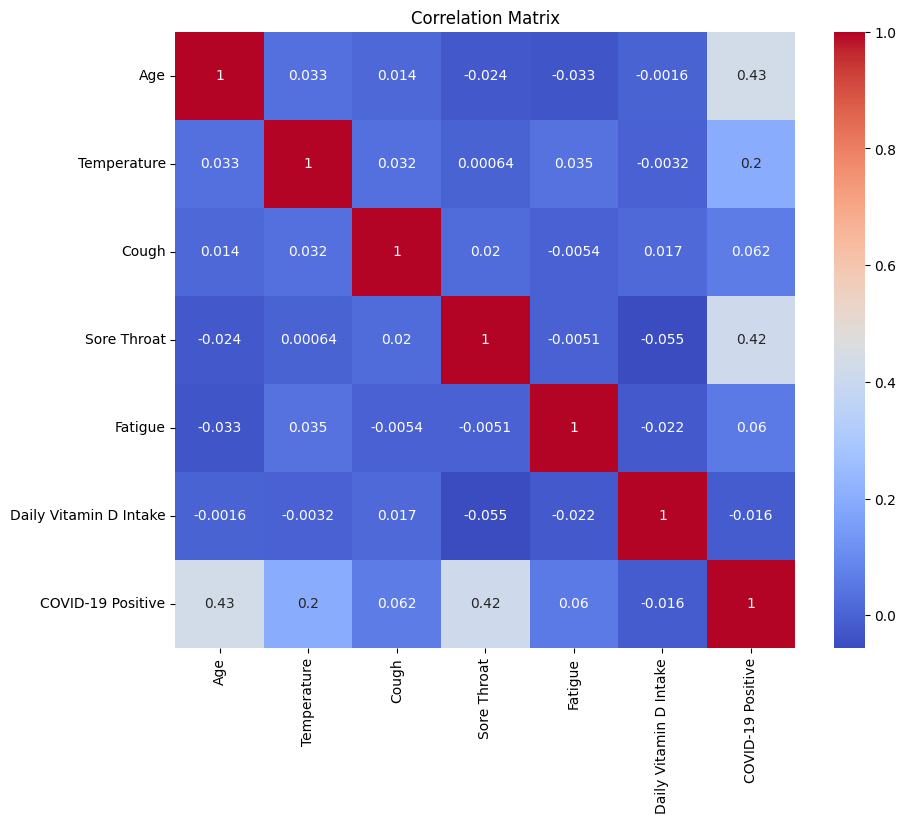

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = newdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()






# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split the data into features (X) and target (y)
X = newdf.drop('COVID-19 Positive', axis=1)
y = newdf['COVID-19 Positive']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
#Calculate the accuracy of the model

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)



Accuracy: 92.96482412060301


# Part 2

In [ ]:
#Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.
# Using for loop
for i in range(1, 11):
    if i % 2 == 0:
        print(i)
#use 'while' loop.
num = 1
while num <= 10:
    if num % 2 == 0:
     print(num)
    num += 1


2
4
6
8
10
2
4
6
8
10


In [ ]:
#Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:
#Score >= 90: "A" 80 <= Score < 90: "B" 70 <= Score < 80: "C" 60 <= Score < 70: "D" Score < 60: "F"

def grade_classifier(score):
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B"
    elif score >= 70:
        return "C"
    elif score >= 60:
        return "D"
    else:
        return "F"

# Example usage:
score = 95
print(f"Score: {score}, Grade: {grade_classifier(score)}")

Score: 95, Grade: A


In [ ]:
#Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:
#If the age is less than 13, print "Child." If the age is between 13 and 19 (inclusive), print "Teenager." If the age is between 20 and 59 (inclusive), print "Adult." If the age is 60 or older, print "Senior Citizen."
# Prompt the user to enter their age
age = int(input("Please Enter your age : "))
if age < 13:
    print("Child.")
elif age >= 13 and age <= 19:
    print("Teenager.")
elif age >= 20 and age <= 59:
    print("Adult.")
else:
    print("Senior Citizen.")


Please Enter your age : 18
Teenager.


In [ ]:
#Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7. 5 * 7 = 35
def multiply_numbers(n1, n2):
   return n1 * n2
result = multiply_numbers(5, 7)
print(f"{5} * {7} = {result}")


5 * 7 = 35


In [ ]:
# Write a Python program that does the following:
#Prompts the user to enter a number (user_num). Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3. Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing). Prints a message indicating whether the classified grade is satisfactory or not.


def grade_classifier(score):
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B"
    elif score >= 70:
        return "C"
    elif score >= 60:
        return "D"
    else:
        return "F"

user_num = int(input("Enter a number: "))

for i in range(1, user_num + 1):
    if i % 3 == 0:
        print(i)

# Predefined score for testing
test_score = 85
classified_grade = grade_classifier(test_score)

if classified_grade == "A" or classified_grade == "B" or classified_grade == "C":
    print("Satisfactory grade: {}".format(classified_grade))
else:
    print("Unsatisfactory grade: {}".format(classified_grade))





Enter a number: 1
Satisfactory grade: B
